In [1]:
import numpy as np 
import matplotlib.pyplot as plt

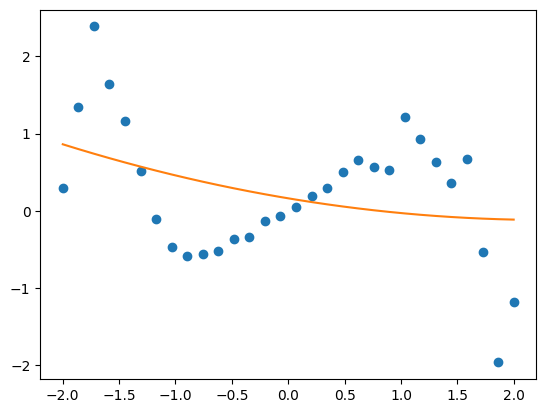

In [2]:
#Dataset1 from the assignment text
n = 30
x = np.linspace(-2, 2, n)
eps = 1
np.random.seed(1)
r = np.random.rand(1, n) * eps
y = x * (np.cos(r + 0.5 * x ** 3) + np.sin(0.5 * x ** 3))
y = np.squeeze(y)

degree = 2
coefficients = np.polyfit(x, y, degree)
fit_y = np.polyval(coefficients, x)
plt.plot(x, y, 'o')
plt.plot(x, fit_y)
plt.show()

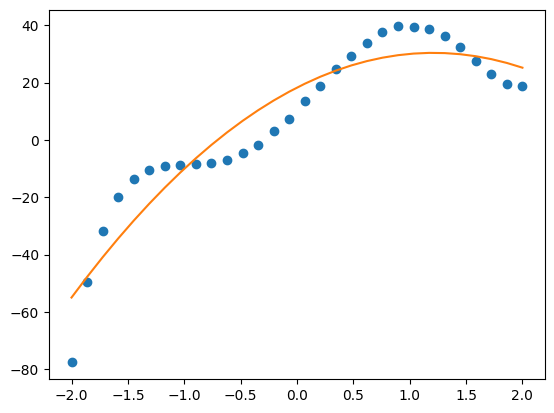

In [3]:
#Dataset2 from the assignment text
n = 30
x = np.linspace(-2,2, n)
eps = 1
np.random.seed(1)
r = np.random.rand(n) * eps
y = 4*x**5 - 5*x**4 - 20*x**3 + 10*x**2 + 40*x + 10 + r

degree = 2
coefficients = np.polyfit(x, y, degree)
fit_y = np.polyval(coefficients, x)

plt.plot(x, y, 'o')
plt.plot(x, fit_y)
plt.show()

# 1. QR Factorization and Backsubstitution

In [4]:

def back_substitution(R, b):
    #Solves the equation Rx = b where R is an upper triangular matrix using back substitution.
    
    n = b.size
    x = np.zeros_like(b)

    # Solving the equation for each row starting from the last row
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(R[i, i+1:], x[i+1:])) / R[i, i]
        
    return x

In [5]:

def qr_factorization_least_squares(A, b):
    # Step 1: Computing QR factorization
    Q, R = np.linalg.qr(A)
    
    # Step 2: Computing Q^T * b
    Qt_b = np.dot(Q.T, b)
    
    # Step 3: Solving the upper triangular system R * x = Q^T * b using back substitution
    x = back_substitution(R, Qt_b)
    
    return x

In [6]:
def construct_vandermonde(x, degree):
    #Constructing the Vandermonde matrix.
    return np.vander(x, degree, increasing=True)

Solution vector x: [ 0.16223369 -0.24370135  0.05302699]


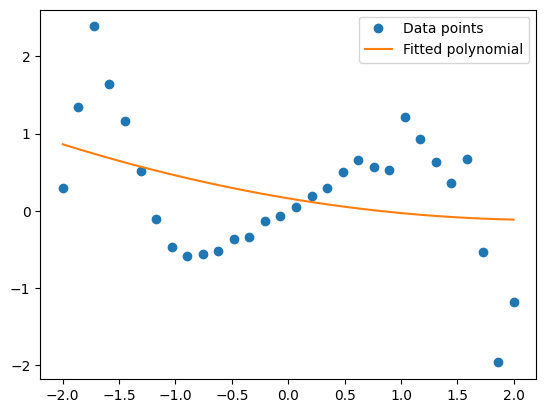

In [7]:
# Dataset1
n = 30
x_data = np.linspace(-2, 2, n)
eps = 1
np.random.seed(1)
r = np.random.rand(n) * eps
y_data = x_data * (np.cos(r + 0.5 * x_data ** 3) + np.sin(0.5 * x_data ** 3))

# Degree of the polynomial
degree = 3

# Construct Vandermonde matrix A and b
A = construct_vandermonde(x_data, degree)
b = y_data

# Solve using QR factorization
x_solution = qr_factorization_least_squares(A, b)
print("Solution vector x:", x_solution)

# Plot the data points and the fitted curve
plt.plot(x_data, y_data, 'o', label='Data points')
plt.plot(x_data, np.dot(A, x_solution), label='Fitted polynomial')
plt.legend()
plt.show()


Solution vector x: [18.23216626 20.03128213 -8.27883947]


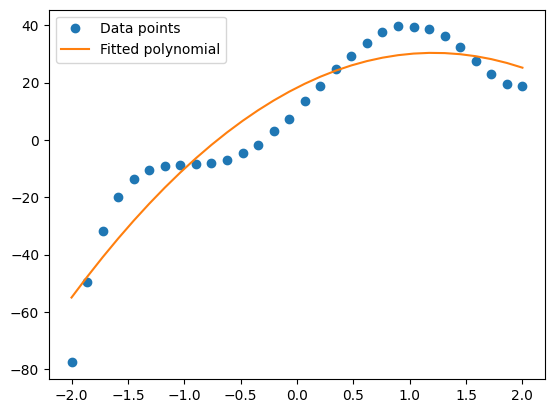

In [8]:
# Dataset2
n = 30
x_data = np.linspace(-2, 2, n)
eps = 1
np.random.seed(1)
r = np.random.rand(n) * eps
y_data = 4*x**5 - 5*x**4 - 20*x**3 + 10*x**2 + 40*x + 10 + r

degree = 3 # Degree of the polynomial

# Construct Vandermonde matrix A and b
A = construct_vandermonde(x_data, degree)
b = y_data

# Solve using QR factorization
x_solution = qr_factorization_least_squares(A, b)
print("Solution vector x:", x_solution)


# Plot the data points and the fitted curve
plt.plot(x_data, y_data, 'o', label='Data points')
plt.plot(x_data, np.dot(A, x_solution), label='Fitted polynomial')
plt.legend()
plt.show()

# 2. Cholesky Factorization and Forwardsubstitution

In [9]:
def cholesky_decomposition(A):
   
    n = A.shape[0]
    L = np.zeros_like(A)
    
    for i in range(n):
        for j in range(i+1):
            if i == j:  # Diagonal elements
                L[i, j] = np.sqrt(A[i, i] - np.sum(L[i, :i] ** 2))
            else:  # Off-diagonal elements
                L[i, j] = (A[i, j] - np.sum(L[i, :j] * L[j, :j])) / L[j, j]
    
    return L

In [10]:
def forward_substitution(L, b):
    #Solves the equation L * y = b using forward substitution, where L is lower triangular.
    
    n = b.size
    y = np.zeros_like(b)
    
    for i in range(n):
        y[i] = (b[i] - np.dot(L[i, :i], y[:i])) / L[i, i]
    
    return y

In [11]:
def cholesky_factorization_least_squares(A, b):
    # Step 1: Compute A^T * A and A^T * b
    AtA = np.dot(A.T, A)
    Atb = np.dot(A.T, b)
    
    # Step 2: Perform Cholesky factorization of AtA (A^T A = L * L^T)
    L = cholesky_decomposition(AtA)
    
    # Step 3: Solve L * y = A^T * b using forward substitution
    y = forward_substitution(L, Atb)
    
    # Step 4: Solve L^T * x = y using back substitution
    x = back_substitution(L.T, y)
    
    return x

In [12]:

def back_substitution(LT, y):
    #Solves the equation LT * x = y using back substitution, where U is upper triangular.
    
    n = y.size
    x = np.zeros_like(y)
    
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(LT[i, i+1:], x[i+1:])) / LT[i, i]
    
    return x

In [13]:
# Example of constructing A (Vandermonde matrix) and b
def construct_vandermonde(x, degree):
    return np.vander(x, degree, increasing=True)

Solution vector x (Cholesky): [ 0.00391624  0.6766862  -0.14680166  0.76040599  0.52753569 -0.89654496
 -0.13338299  0.15972865]


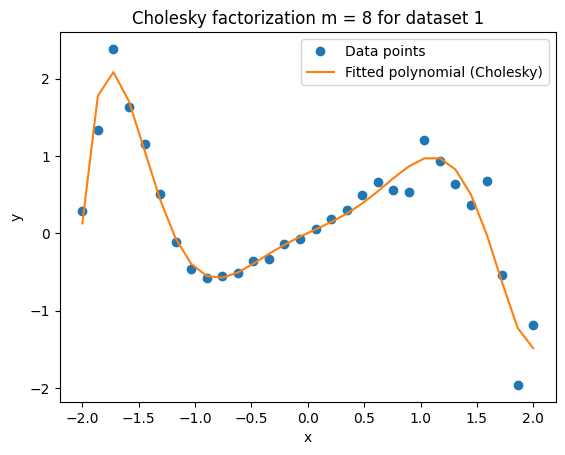

In [14]:
# Dataset1
n = 30
x_data = np.linspace(-2, 2, n)
eps = 1
np.random.seed(1)
r = np.random.rand(n) * eps
y_data = x_data * (np.cos(r + 0.5 * x_data ** 3) + np.sin(0.5 * x_data ** 3))

# Degree of the polynomial degree = m (Change to m=3 and m=8)
degree = 8

# Construct Vandermonde matrix A and b
A = construct_vandermonde(x_data, degree)
b = y_data

# Solve using Cholesky factorization
x_solution_cholesky = cholesky_factorization_least_squares(A, b)
print("Solution vector x (Cholesky):", x_solution_cholesky)

plt.plot(x_data, y_data, 'o', label='Data points')
plt.plot(x_data, np.dot(A, x_solution_cholesky), label='Fitted polynomial (Cholesky)')
plt.title(f'Cholesky factorization m = {degree} for dataset 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Solution vector x (Cholesky): [ 10.39609767  39.54262529  10.45039633 -18.75412619  -5.38299988
   3.34351376   0.07157609   0.09483627]


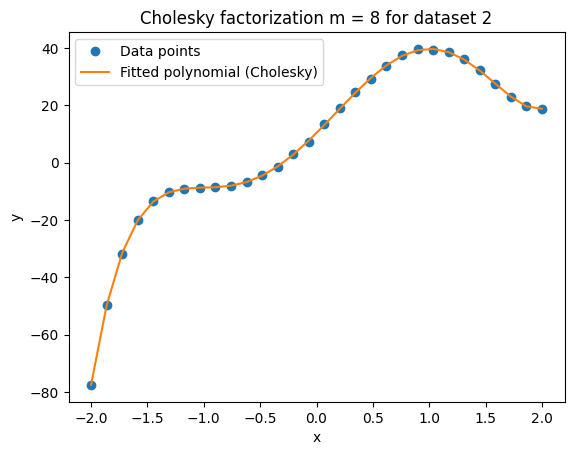

In [15]:
# Dataset1
n = 30
x_data = np.linspace(-2, 2, n)
eps = 1
np.random.seed(1)
r = np.random.rand(n) * eps
y_data = 4*x**5 - 5*x**4 - 20*x**3 + 10*x**2 + 40*x + 10 + r

# Degree of the polynomial degree = m (Change to m=3 and m=8)
degree = 8

# Construct Vandermonde matrix A and b
A = construct_vandermonde(x_data, degree)
b = y_data

# Solve using Cholesky factorization
x_solution_cholesky = cholesky_factorization_least_squares(A, b)
print("Solution vector x (Cholesky):", x_solution_cholesky)

plt.plot(x_data, y_data, 'o', label='Data points')
plt.plot(x_data, np.dot(A, x_solution_cholesky), label='Fitted polynomial (Cholesky)')
plt.title(f'Cholesky factorization m = {degree} for dataset 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 3. Discussing the difference between the two above methods 